# Data curation

### Import some necessary functions

In [1]:
import os, pydicom, sys
sys.path.append('..')
import numpy as np
import SimpleITK as sitk
from Distribute_Patients import Separate_files
from Dicom_RT_and_Images_to_Mask.Image_Array_And_Mask_From_Dicom_RT import Dicom_to_Imagestack
from Dicom_RT_and_Images_to_Mask.Plot_And_Scroll_Images.Plot_Scroll_Images import plot_scroll_Image
from Make_Single_Images.Make_Single_Images_Class import run_main

## Finding the Data

### Find where we put our data

In [2]:
data_path = os.path.join('..','Data','Whole_Patients')
print('We have ' + str(len(os.listdir(data_path))) + ' patients!')

We have 20 patients!


## Ensuring contour fidelity...

### Note that we've set 'get_images_mask' to False, this means we won't be getting any of the image data, just looking at the dicom RT files

In [3]:
Dicom_Reader = Dicom_to_Imagestack(get_images_mask=False)

In [4]:
Dicom_Reader.down_folder(data_path)

### What ROI names do we have?

#### This will tell us all the unique roi names, hence all_rois

In [5]:
for roi in Dicom_Reader.all_rois:
    print(roi)

bma_liver
Liver_BMA_Program_4
tried_liver
best_liver
Liver


## Make contour associations

#### We have quite a few contour names here.. now, we can either change the ROI names in the RT files, or make an associations file

#### The associations file associates a contour name with another one {'Current contour':'Desired name'}

In [6]:
associations = {'Liver_BMA_Program_4':'Liver',
                'bma_liver':'Liver',
                'best_liver':'Liver',
                'tried_liver':'Liver'}

### Tell the Dicom_Reader that we want to set the associations, get the images and mask for contour 'Liver'

In [17]:
Dicom_Reader.set_associations(associations)
Dicom_Reader.set_get_images_and_mask(True)
Dicom_Reader.set_contour_names(['Liver'])

### Re-write RTs
#### This is commented out, because if I run it, then the example above won't show any different contour names

In [8]:
# Dicom_Reader.associations = associations
# for RT in Dicom_Reader.all_RTs:
#     Dicom_Reader.rewrite_RT(RT)

## Pulling images and mask

### We'll first do this with one patient

In [18]:
patient_data_path = os.path.join(data_path,'ABD_LYMPH_036')
Dicom_Reader.Make_Contour_From_directory(patient_data_path)
print('Done!')

Done!


## View images

In [10]:
%matplotlib inline

### The images and mask are saved within the Dicom_Reader class, so we just have to load them

In [19]:
Images = Dicom_Reader.ArrayDicom
mask = Dicom_Reader.mask # This is the mask

In [21]:
Dicom_Reader.rois_in_case

['Liver_BMA_Program_4']

#### Threshold

In [12]:
Images[Images<-200] = -200
Images[Images>200] = 200

(<Figure size 432x288 with 1 Axes>,
 <Dicom_RT_and_Images_to_Mask.Plot_And_Scroll_Images.Plot_Scroll_Images.IndexTracker at 0x1dd000e38d0>)

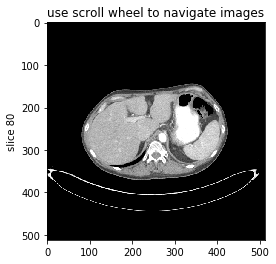

In [15]:
plot_scroll_Image(Images)

In [14]:
Images[mask==1] += 300

## Recap

### Checking ROI contour names and making associations

### Loading in image and mask from desired contour name

### Viewing images and mask

In [ ]:
def write_data(data_path, out_path, Dicom_Reader):
    desc = 'TCIA_Liver_Patients'
    Dicom_Reader.set_description(desc)
    iteration = 0
    for patient in os.listdir(data_path):
        print(patient)
        patient_data_path = os.path.join(data_path,patient)
        out_file = os.path.join(patient_data_path, desc + '_Iteration_' + str(iteration) + '.txt')
        if not os.path.exists(out_file):
            Dicom_Reader.Make_Contour_From_directory(patient_data_path)
            Dicom_Reader.set_iteration(iteration)
            Dicom_Reader.write_images_annotations(out_path)
        iteration += 1
    return None

In [15]:
data_path = os.path.join('..','Data','Whole_Patients')
output_path = os.path.join('..','Data','Niftii_Arrays')
#write_data(data_path,output_path, Dicom_Reader)
#Separate_files(output_path) # Separate into a Training/Validation/Test set
# run_main(output_path,extension=5)